# Import Library

In [2]:
#Import standard library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

# Importing NLTK library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer          
from nltk.stem import WordNetLemmatizer

# Import Vectorizers library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Load Data

In [4]:
printify = pd.read_csv('../datasets/subreddit_printify_data.csv')
printful = pd.read_csv('../datasets/subreddit_printful_data.csv')

# EDA Data

In [6]:
printify.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body'], dtype='object')

In [7]:
printify['source'] = '0' #printify 

In [8]:
printful.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body'], dtype='object')

In [9]:
printful['source'] = '1' #printful

In [10]:
# We set binary value in 'source'
# printify = 0
# printful = 1

# This will help when do modeling

In [11]:
# merge df to analyst data
merged_df = pd.concat([printful, printify], ignore_index=True, sort=False)

In [12]:
# Explore data

In [13]:
merged_df.head() 

,title,score,id,url,comms_num,created,body,source
0,Good news for Printful sellers in the UK and C...,1,1gbtfww,https://www.reddit.com/r/printful/comments/1gb...,0,2024-10-25 19:48:41,"Hi, everyone! 👋 \n\nWe're happy to introduce o...",1
1,All-over printed tote with solid black backgro...,1,1gp3bzc,https://www.reddit.com/r/printful/comments/1gp...,2,2024-11-12 04:11:53,Given there are no black all-over print tote b...,1
2,Site critique and marketing recommendations,0,1goxfq5,https://i.redd.it/etlv6uum2b0e1.png,1,2024-11-12 00:15:53,I am using printful to produce shirts and hoo...,1
3,About Tote Bags,1,1golcgs,https://www.reddit.com/r/printful/comments/1go...,3,2024-11-11 12:52:59,Does anybody work with Tote Bags? Are they goo...,1
4,Can we ensure two different products are deliv...,3,1go45m9,https://www.reddit.com/r/printful/comments/1go...,3,2024-11-10 23:15:02,"Kindly help with the question, as asked in the...",1


In [14]:
merged_df.tail()

,title,score,id,url,comms_num,created,body,source
1973,2nd Shipping Profile,2,1c2ao2e,https://www.reddit.com/r/Printify/comments/1c2...,4,2024-04-12 21:32:43,Hi everyone! I want to add a second shipping p...,0
1974,New seller help.,1,1c2bdsj,https://www.reddit.com/r/Printify/comments/1c2...,0,2024-04-12 22:02:14,"Hi, I am wanting to put my product on etsy asa...",0
1975,WTF what is this seller shipping cost?,0,1c2gpfx,https://i.redd.it/n5oamh2ze3uc1.jpeg,19,2024-04-13 01:37:30,NaN,0
1976,Requesting New Custom Products,1,1c29w21,https://www.reddit.com/r/Printify/comments/1c2...,1,2024-04-12 21:00:14,Hi y'all! Ive been using Printify for a few mo...,0
1977,Does anybody have experience with the round ru...,1,1c23puf,https://www.reddit.com/r/Printify/comments/1c2...,1,2024-04-12 15:11:02,I came across Printify while searching for a w...,0


In [15]:
# Title and Body columns is our target column that NLP will work with. 
# If body is null, it has only one image in the post that is not suitable for NLP.

In [16]:
merged_df[merged_df['body'].isnull()]

,title,score,id,url,comms_num,created,body,source
5,can I add multiple printful products on shopif...,1,1gnjrxj,https://i.redd.it/23mjy2m7wxzd1.png,4,2024-11-10 03:57:31,NaN,1
9,Printful is merging with Printify,28,1gkak3r,https://www.printful.com/news/merger,33,2024-11-05 23:22:33,NaN,1
22,Review of the Classic Fit Knitted Crew Neck Sw...,28,1ggep88,https://www.reddit.com/gallery/1ggep88,22,2024-10-31 20:36:44,NaN,1
31,What do you guys think about the quality of th...,2,1gcoy71,https://www.reddit.com/gallery/1gcoy71,6,2024-10-26 23:29:50,NaN,1
33,Would I be able to create this design using Pr...,4,1gc6fkc,https://i.redd.it/uz415wug9zwd1.png,9,2024-10-26 05:23:11,NaN,1
...,...,...,...,...,...,...,...,...
1935,Best Print on Demand website/supplier for TikT...,1,1ca6i0z,/r/TikTokshop/comments/1c9yal3/best_print_on_d...,1,2024-04-22 16:35:12,NaN,0
1938,"People visit my store, but rarely buy from it....",1,1c9jm2f,https://dgd-products.myshopify.com,19,2024-04-21 21:45:49,NaN,0
1946,Can you put multiple shirt designs on one eBay...,2,1c8h16x,https://www.reddit.com/r/Printify/comments/1c8...,0,2024-04-20 11:20:33,NaN,0
1971,https://caryart1.etsy.com,0,1c3978y,https://www.reddit.com/r/Printify/comments/1c3...,0,2024-04-14 01:56:03,NaN,0


In [17]:
merged_df['body'].isna().sum() # Contain picture in the body 164 rows.

164

In [18]:
merged_df.dropna(subset=['body'], inplace=True) # Drop as it won't do any benefits for NLP

# Pre-Processing 
- Remove special characters
- Tokenizing
- Lemmatizing/Stemming

# lemmatization
We decided to use lemmatization because it is more accurate, though computationally more expensive than stemming; however, our dataset was not large enough to impact performance when compared with accuracy.

In [21]:
# Create function to ensure that words are normalized in lowercase for further analysis.

def lemma_function(string):
    # Tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    string_token = tokenizer.tokenize(string.lower())
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    string_lemma = [lemmatizer.lemmatize(word) for word in string_token]
    # Return joined string
    return ' '.join(string_lemma)

In [22]:
# Apply function to 'title' and 'body' but add new col. called 'title_lemma' &  'body_lemma'

merged_df['title_lemma'] = merged_df['title'].apply(lambda i : lemma_function(i))
merged_df['body_lemma'] = merged_df['body'].apply(lambda i : lemma_function(i))

In [23]:
merged_df.head() # Check work

,title,score,id,url,comms_num,created,body,source,title_lemma,body_lemma
0,Good news for Printful sellers in the UK and C...,1,1gbtfww,https://www.reddit.com/r/printful/comments/1gb...,0,2024-10-25 19:48:41,"Hi, everyone! 👋 \n\nWe're happy to introduce o...",1,good news for printful seller in the uk and ca...,hi everyone we re happy to introduce our impro...
1,All-over printed tote with solid black backgro...,1,1gp3bzc,https://www.reddit.com/r/printful/comments/1gp...,2,2024-11-12 04:11:53,Given there are no black all-over print tote b...,1,all over printed tote with solid black background,given there are no black all over print tote b...
2,Site critique and marketing recommendations,0,1goxfq5,https://i.redd.it/etlv6uum2b0e1.png,1,2024-11-12 00:15:53,I am using printful to produce shirts and hoo...,1,site critique and marketing recommendation,i am using printful to produce shirt and hoodi...
3,About Tote Bags,1,1golcgs,https://www.reddit.com/r/printful/comments/1go...,3,2024-11-11 12:52:59,Does anybody work with Tote Bags? Are they goo...,1,about tote bag,doe anybody work with tote bag are they good w...
4,Can we ensure two different products are deliv...,3,1go45m9,https://www.reddit.com/r/printful/comments/1go...,3,2024-11-10 23:15:02,"Kindly help with the question, as asked in the...",1,can we ensure two different product are delive...,kindly help with the question a asked in the t...


In [24]:
# Check word count and lenght after lemmatize of the 'title'
merged_df['title_lemma_length'] = merged_df['title_lemma'].apply(lambda x : len(x))
merged_df['title_lemma_word_count'] = merged_df['title_lemma'].apply(lambda x : len(x.split()))
merged_df['title_length'] = merged_df['title'].apply(lambda x : len(x))
merged_df['title_word_count'] = merged_df['title'].apply(lambda x : len(x.split()))

In [25]:
# Check word count and lenght after lemmatize of the 'body'
merged_df['body_lemma_length'] = merged_df['body_lemma'].apply(lambda x : len(x))
merged_df['body_lemma_word_count'] = merged_df['body_lemma'].apply(lambda x : len(x.split()))
merged_df['body_length'] = merged_df['body'].apply(lambda x : len(x))
merged_df['body_word_count'] = merged_df['body'].apply(lambda x : len(x.split()))

In [26]:
# Check if "print on demand" exists in the 'body' column
print(len(merged_df[merged_df['body'].str.contains('print on demand', case=False, na=False)]))

# Check if "print on demand" exists in the lemmatized 'body_lemma' column
print(len(merged_df[merged_df['body_lemma'].str.contains('print on demand', case=False, na=False)]))

# Words appearing within n words of each other
# Matches "print" and "on" and "demand" within 0-3 words of each other
pattern = r'print\W+(?:\w+\W+){0,3}?on\W+(?:\w+\W+){0,3}?demand'
print(merged_df['body'].str.contains(pattern, case=False, na=False).sum())

57
76
76


In [27]:
# Replace the multi-word phrase "print on demand" into a single token "printondemand"
# Reasons...NLP tasks to treat the phrase as a single entity rather than separate words during analysis
merged_df['body'] = merged_df['body'].str.lower().str.replace('print on demand', 'printondemand')

# Do it with 'body_lemma' as well
merged_df['body_lemma'] = merged_df['body_lemma'].str.lower().str.replace('print on demand', 'printondemand')

In [28]:
# Check if any "print on demand" still exists
print(merged_df['body'].str.contains('print on demand').sum())

# Check if 'printondemand' exists now
print(merged_df['body'].str.contains('printondemand').sum())

# No 'print on demand' only 'printondemand' as we phrase to single token

0
57


In [29]:
#Export clean information 
merged_df.to_csv('../datasets/print_clean.csv')

In [30]:
# Add stop word for POD
# (POD is stand for Print on Demand)
new_stopwords = stopwords.words('english')
new_stopwords.extend(['https','order','platform','pod', 'printify', 'printful','want','would', 
                      'print', 'on', 'demand', 'printondemand','via','com','anyone','one',
                      'with','needed', 'printify', 'appriciated', 'bring','please','products'])

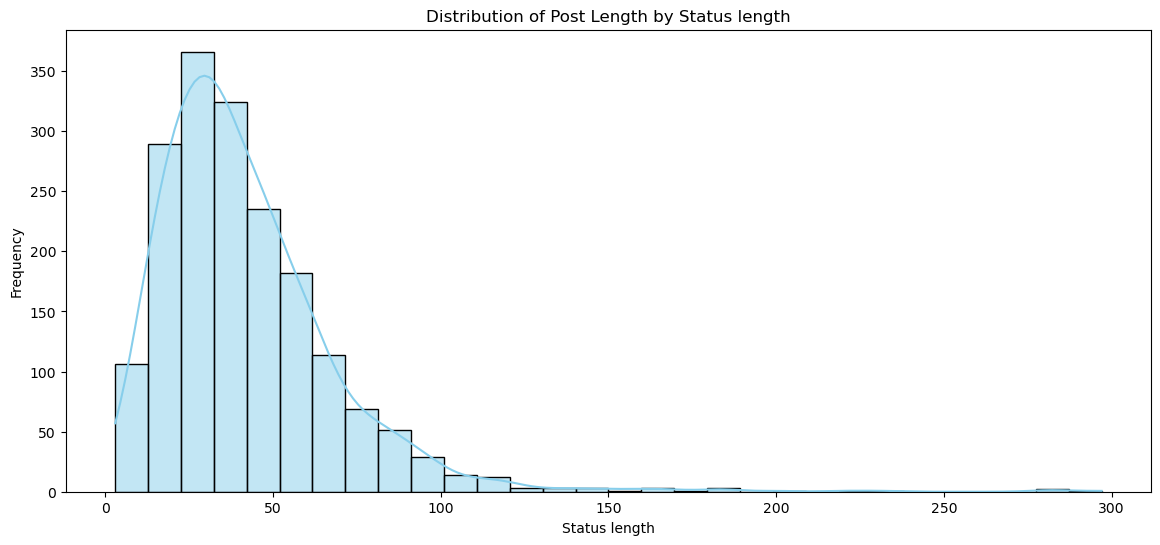

In [31]:
# See distribution of Post Length by Status length
plt.figure(figsize=(14, 6))

sns.histplot(merged_df['title_length'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Post Length by Status length')
plt.xlabel('Status length')
plt.ylabel('Frequency');
# plt.savefig('../images/distribution_post_length_statuslengh.png',dpi=2500)
plt.show();

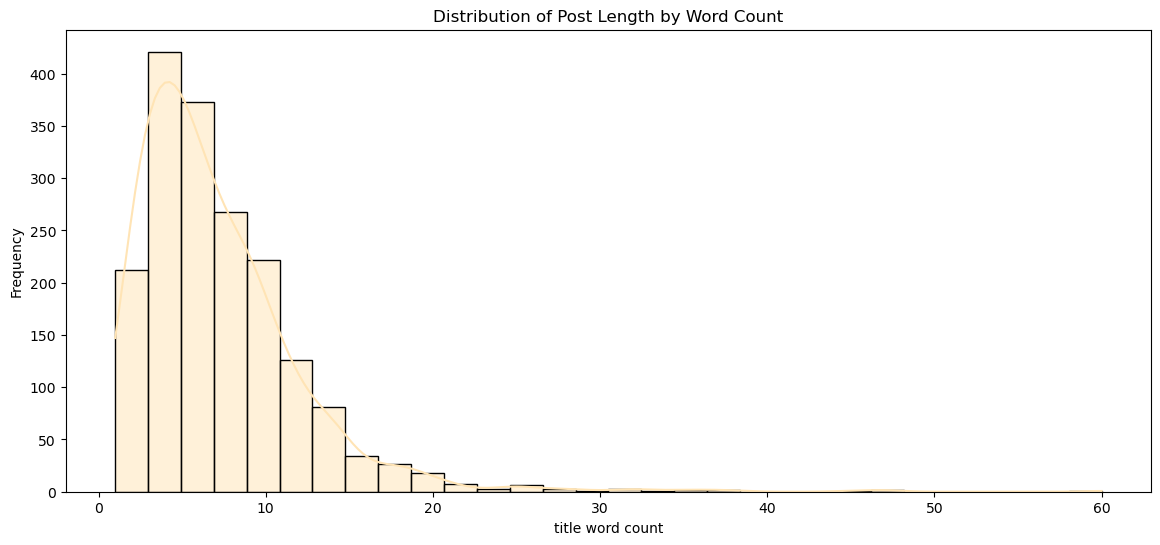

In [32]:
# See Distribution of Post Length by Word Count
plt.figure(figsize=(14, 6))

sns.histplot(merged_df['title_word_count'], kde=True, color='moccasin', bins=30)
plt.title('Distribution of Post Length by Word Count')
plt.xlabel('title word count')
plt.ylabel('Frequency');
# plt.savefig('../images/distribution_post_length_wordcount.png',dpi=2500)
plt.show();

# Vectorize the text

In [34]:
# In order to perform EDA on word count data, we'll need to count vectorize.
# Define Feature and target variable for further analysis
X_title = merged_df['title']
X_body = merged_df['body']
y = merged_df['source']

## Vectorize title

In [36]:
X_title.shape, y.shape

((1814,), (1814,))

In [37]:
# Split the data into the training and testing sets
X_train_title, X_test_title, y_train_title, y_test_title = train_test_split(X_title,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [38]:
y_train_title.value_counts(normalize=True).mul(100).round(2)

source
1    51.52
0    48.48
Name: proportion, dtype: float64

In [39]:
y_test_title.value_counts(normalize=True).mul(100).round(2)

source
1    51.42
0    48.58
Name: proportion, dtype: float64

In [40]:
# Instantiate a CountVectorizer
cvec = CountVectorizer(stop_words=new_stopwords)

cvec.fit(X_train_title)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [41]:
# Transform the corpus
X_train_ts = cvec.transform(X_train_title)
X_test_ts = cvec.transform(X_test_title)

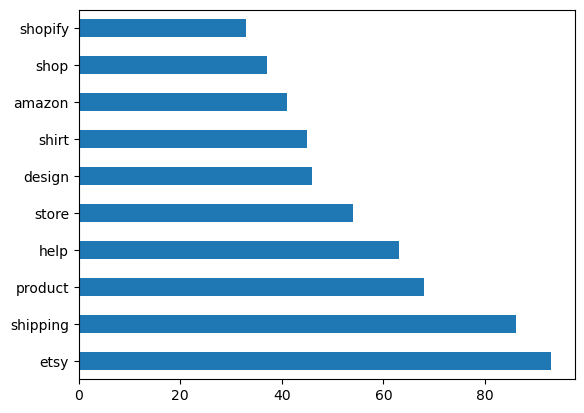

In [42]:
X_train_df = pd.DataFrame(X_train_ts.todense(), 
                          columns=cvec.get_feature_names_out())
# Plot top 10 words
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

## Vectorize body

In [44]:
X_body.shape, y.shape

((1814,), (1814,))

In [45]:
X_train_body, X_test_body, y_train_body, y_test_body = train_test_split(X_body,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [46]:
y_train_body.value_counts(normalize=True).mul(100).round(2)

source
1    51.52
0    48.48
Name: proportion, dtype: float64

In [47]:
y_test_body.value_counts(normalize=True).mul(100).round(2)

source
1    51.42
0    48.58
Name: proportion, dtype: float64

In [48]:
cvec = CountVectorizer(stop_words=new_stopwords)

cvec.fit(X_train_body)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [49]:
X_train_body = cvec.transform(X_train_body)
X_test_body = cvec.transform(X_test_body)

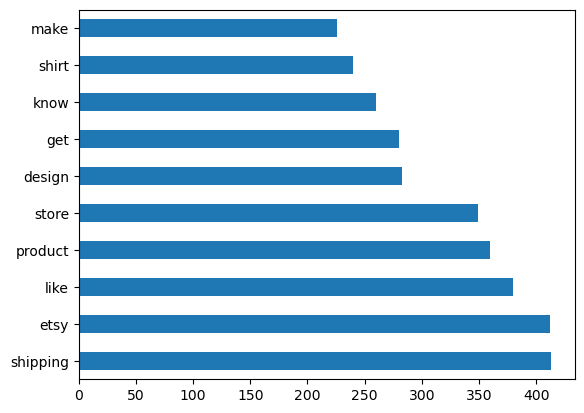

In [50]:
X_train_body_df = pd.DataFrame(X_train_body.todense(), 
                          columns=cvec.get_feature_names_out())
# Plot top 10 words
X_train_body_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [51]:
# Instantiate the transformer
#tvec = TfidfVectorizer(stop_words=new_stopwords)

In [52]:
# Convert training data to dataframe
#X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), columns=tvec.get_feature_names_out())

# Plot top occurring words
#X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [53]:
#TfidfVectorizer and CountVectorizer get the same top 10 words in title and body text 

In [54]:
#Key takeaway
# etsy , shopify pop in the POD topic that imply to be a indirect competitor.

In [55]:
# Bigram and Trigram for title to analyst what's the keytopic in sub-reddit

# Identify the interested in society of POD
X_gram_cvec = X_train_title

In [56]:
bi_cvec = CountVectorizer(analyzer='word', ngram_range=(2, 2), stop_words=new_stopwords)
bi_cvec.fit(X_gram_cvec)

CountVectorizer(ngram_range=(2, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [57]:
X_bigram = bi_cvec.transform(X_gram_cvec)

In [58]:
bigram_df = pd.DataFrame(X_bigram.todense(), columns=bi_cvec.get_feature_names_out())
bigram_df.sum().sort_values(ascending=False).head(10)

tiktok shop               19
need help                 15
amazon integration         9
mock ups                   8
sales tax                  7
pop store                  6
bella canvas               5
international shipping     5
shopify store              5
etsy integration           5
dtype: int64

In [59]:
trigrams =CountVectorizer(analyzer='word', ngram_range=(3, 3), stop_words=new_stopwords)
trigrams.fit(X_gram_cvec)

CountVectorizer(ngram_range=(3, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [60]:
X_trigrams = trigrams.transform(X_gram_cvec)

In [61]:
trigram_df = pd.DataFrame(X_trigrams.todense(), columns=trigrams.get_feature_names_out())
trigram_df.sum().sort_values(ascending=False).head(10)

double revenue email          2
product sell well             2
vat registration avoid        2
paid ads turned               2
design code landing           2
sales paid ads                2
landing page dashboard        2
embroidery friendly design    2
minimalist shirt designs      2
photo embroidery friendly     2
dtype: int64

In [62]:
# Compare keyword between 2 platforms

X = merged_df['title'] + " " + merged_df['body']
y = merged_df['source']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1, #(90:10)
                                                    stratify=y,
                                                    random_state=42)

c_vec_compare = CountVectorizer(stop_words=new_stopwords)
c_vec_compare.fit(X_train)
X_train_tf = c_vec_compare.transform(X_train)
X_train_df= pd.DataFrame(X_train_tf.toarray(), columns=c_vec_compare.get_feature_names_out())

In [63]:
X_train_df['source'] = y_train.values

In [64]:
# Sum keyword counts and sort by frequency
printful = X_train_df[X_train_df['source'] == '1']
numeric_printful = printful.select_dtypes(include=['number'])
top_10_printful = numeric_printful.sum().sort_values(ascending=False).head(10)

# Print the top 10 keywords
print(top_10_printful)

etsy        345
product     341
shipping    336
store       296
like        259
design      233
get         200
shirt       199
know        195
make        175
dtype: int64


In [65]:
# Sum keyword counts and sort by frequency
printify = X_train_df[X_train_df['source'] == '0']
numeric_printify = printify.select_dtypes(include=['number'])
top_10_printify = numeric_printify.sum().sort_values(ascending=False).head(10)

# Print the top 10 keywords
print(top_10_printify)

shipping    374
etsy        364
product     259
like        253
store       249
get         192
new         190
design      186
help        182
know        174
dtype: int64


In [66]:
# Define custom colors for Printful and Printify
printful_color = '#6a4c9c'
printify_color = '#4caf50'

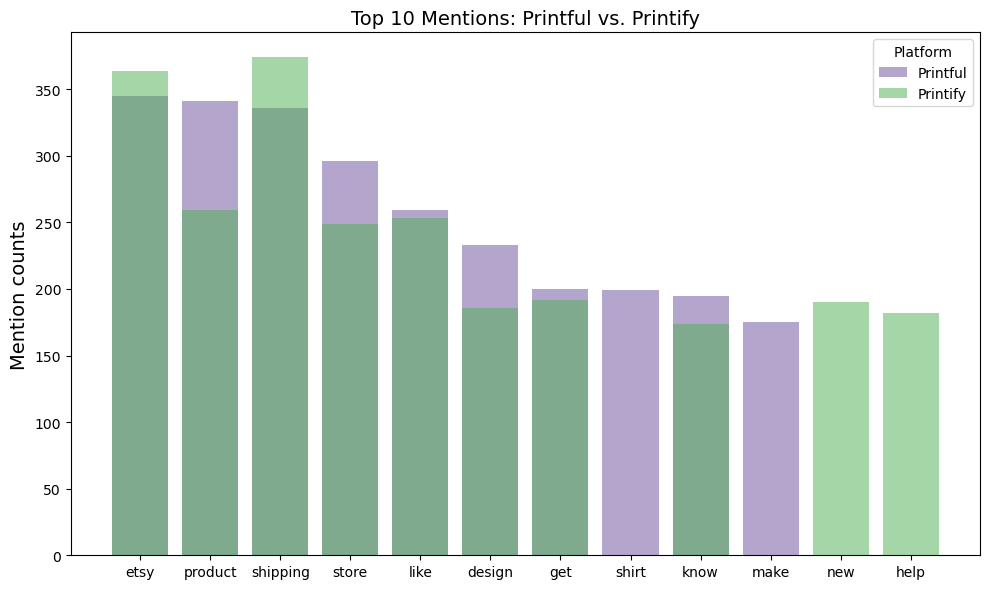

In [139]:
# Set fig size
plt.figure(figsize=(10, 6))

# Plot comparison
plt.bar(top_10_printful.index, top_10_printful, label='Printful', color=printful_color, alpha=0.5)
plt.bar(top_10_printify.index, top_10_printify, label='Printify', color=printify_color, alpha=0.5)

# Customize and show plot
plt.title('Top 10 Mentions: Printful vs. Printify', fontsize=14)
plt.ylabel('Mention counts', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.legend(title='Platform', fontsize=10)
plt.tight_layout()
# plt.savefig('../images/Top10_mentions.png',dpi=2500) #Save images
plt.show();

In [68]:
# Key takeaway from "Top 10 Features: Printful vs. Printify" (Bat graph above)
# Differences in Rankings

# For shipping, it ranks #1 on Printify and #3 on Printful, indicating shipping might be a slightly higher priority for Printify users.
# Etsy ranks slightly higher for Printify (#2 vs. #1 for Printful), possibly showing Printify users are equally or more reliant on Etsy.

# Conclusions
# Both platforms serve users interested in product customization, marketplace integration, and shipping.
# Printful users might focus more on clothing items and seek detailed knowledge about the platform.
# Printify users might be more concerned with new features or seeking support.

In [69]:
#JAMES
# We wonder what helps do the user needs?
# A user-defined function to tokenize text and extract special "help + next word" phrases
# Returns a list containing both individual words and "help" phrases
def unigram_and_help_phrases(text):
    # Convert entire text to lowercase and split into individual words
    words = text.lower().split()
    
    # Use list comprehension to extract "help + next word" phrases
    help_phrases = [f"help {words[i+1]}" for i in range(len(words)-1) if words[i] == 'help']
    
    # Extract sentences containing the word 'help'
    help_sentences = [sentence.strip() for sentence in text.split('.') if 'help' in sentence.lower()]
    help_sentences = [sentence + '.' if not sentence.endswith('.') else sentence for sentence in help_sentences]

    # Combine words, help phrases, and help sentences into one list
    all_tokens = words + help_phrases + help_sentences
    
    return all_tokens

In [70]:
merged_df['help_phrases_results'] = merged_df['title_lemma'].apply(unigram_and_help_phrases)

print(merged_df[['title_lemma', 'help_phrases_results']].head())

                                         title_lemma  \
0  good news for printful seller in the uk and ca...   
1  all over printed tote with solid black background   
2         site critique and marketing recommendation   
3                                     about tote bag   
4  can we ensure two different product are delive...   

                                help_phrases_results  
0  [good, news, for, printful, seller, in, the, u...  
1  [all, over, printed, tote, with, solid, black,...  
2   [site, critique, and, marketing, recommendation]  
3                                 [about, tote, bag]  
4  [can, we, ensure, two, different, product, are...  


In [71]:
# It turns out this approach not a best fit and not fulfil what we're looking for... 
# So it comes to another code below

In [72]:
from collections import Counter  # Import Counter from collections module

# Ensure 'help' is included in the stopwords list
help_stop_words = set(new_stopwords) | {'help.'}  # Exclude 'help' as we don't need it since we're focusing on help already.

# Initialize a Counter to keep track of the frequency of words after 'help'
next_word_counter = Counter()

# Iterate through each row
for index, row in merged_df.iterrows():
    help_phrases = row['help_phrases_results']
    
    # Find help-related phrases
    if 'help' in help_phrases:
        # Get the index of 'help' in the phrase
        help_index = help_phrases.index('help')
        
        # Get the word following 'help' (if it exists)
        if help_index + 1 < len(help_phrases):
            next_word = help_phrases[help_index + 1]
            
            # Ignore the stop word
            if next_word not in help_stop_words:
                # Add the next word to the counter
                next_word_counter[next_word] += 1
        else:
            print("no 'help' in sentence")

# Display the top 10 most common words following 'help', excluding stopwords
print("Top 10 most common words following 'help' (excluding stopwords):\n")
for word, count in next_word_counter.most_common(10):  # Limit to top 10
    print(f"{word}: {count}")

Top 10 most common words following 'help' (excluding stopwords):

new seller help.: 2
hoodie design 3d printing help.: 1
getting a product integration restriction error when i try to publish to etsy help.: 1
calculating profit help.: 1
appreciated: 1
new to printful need help.: 1
why are some of my tshirt mock ups blank also i selected a mock up with my image printed on front for my etsy shop but when i try to upload it on etsy it look blank please help.: 1
setting up website with printful help.: 1
i need pricing help.: 1
setting: 1


In [73]:
merged_df.to_csv('../datasets/print_with_helpsentence.csv')